In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

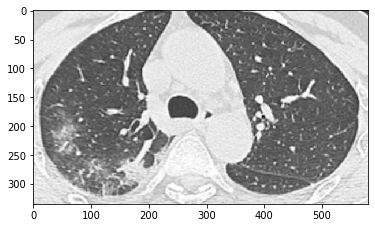

In [2]:
DATADIR = "Corona"

CATEGORIES = ["CT_COVID", "CT_NonCOVID"]

for category in CATEGORIES:  # iterasi covid dan non covid
    path = os.path.join(DATADIR,category)  # buat direktori covid dan covid
    for img in os.listdir(path):  # iterasi gambar covid dan non covid
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert ke array
        plt.imshow(img_array, cmap='gray')  
        plt.show()  # display!

        break  # untuk menampilkan satu maka perlu di break loopnya
    break  #untuk menampilkan satu maka perlu di break loopnya

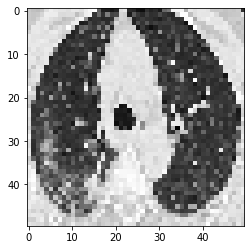

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # loop covid19 dan non covid19

        path = os.path.join(DATADIR,category)  # buat direktori covid19 dan non covid19
        class_num = CATEGORIES.index(category)  # buat klasifikasi  (0 or a 1). 0=covid 1=noncovid19

        for img in tqdm(os.listdir(path)):  # iterasi gambar covid dan non covid 19
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert ke array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize ukuran data
                training_data.append([new_array, class_num])  # tambahkan ini ke training data
            except Exception as e:  # membuat ouput clean
                pass


create_training_data()

print(len(training_data))

100%|██████████| 397/397 [00:01<00:00, 246.32it/s]

746


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
1
0
1
0
0


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 77]
   [ 67]
   [ 69]
   ...
   [ 69]
   [ 76]
   [ 81]]

  [[ 90]
   [ 70]
   [ 75]
   ...
   [ 74]
   [ 69]
   [ 69]]

  [[ 72]
   [ 73]
   [ 70]
   ...
   [ 80]
   [ 74]
   [ 78]]

  ...

  [[ 76]
   [ 83]
   [ 87]
   ...
   [ 70]
   [ 80]
   [ 89]]

  [[ 89]
   [ 72]
   [ 78]
   ...
   [ 89]
   [ 79]
   [231]]

  [[ 85]
   [224]
   [ 76]
   ...
   [137]
   [126]
   [ 95]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # converts 3d menjadi 1D

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y = np.array(y)
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 522 samples, validate on 224 samples
Epoch 1/3
522/522 [==============================] - 12s 24ms/sample - loss: 0.9610 - accuracy: 0.4885 - val_loss: 0.6696 - val_accuracy: 0.6518
Epoch 2/3
522/522 [==============================] - 12s 22ms/sample - loss: 0.6472 - accuracy: 0.5900 - val_loss: 0.6177 - val_accuracy: 0.6473
Epoch 3/3
522/522 [==============================] - 12s 22ms/sample - loss: 0.5843 - accuracy: 0.6648 - val_loss: 0.6576 - val_accuracy: 0.6027


In [12]:
model.fit(X, y, batch_size=32, epochs=6, validation_split=0.3)

Train on 522 samples, validate on 224 samples
Epoch 1/6
522/522 [==============================] - 12s 23ms/sample - loss: 0.5581 - accuracy: 0.6877 - val_loss: 0.6575 - val_accuracy: 0.6964
Epoch 2/6
522/522 [==============================] - 12s 23ms/sample - loss: 0.5091 - accuracy: 0.7548 - val_loss: 0.5499 - val_accuracy: 0.7321
Epoch 3/6
522/522 [==============================] - 12s 23ms/sample - loss: 0.4536 - accuracy: 0.7854 - val_loss: 0.5379 - val_accuracy: 0.7277
Epoch 4/6
522/522 [==============================] - 12s 22ms/sample - loss: 0.4082 - accuracy: 0.8065 - val_loss: 0.5479 - val_accuracy: 0.7411
Epoch 5/6
522/522 [==============================] - 12s 23ms/sample - loss: 0.3973 - accuracy: 0.8180 - val_loss: 0.5403 - val_accuracy: 0.7589
Epoch 6/6
522/522 [==============================] - 12s 23ms/sample - loss: 0.3727 - accuracy: 0.8218 - val_loss: 0.5062 - val_accuracy: 0.7679
